<h1 style="font-family:verdana;"> <center>📚Binary Classification of Machine Failures: EDA and Baseline models</center> </h1>
<p><center style="color: crimson; font-family:cursive;">One notebook that make you a better kaggler</center></p>

***

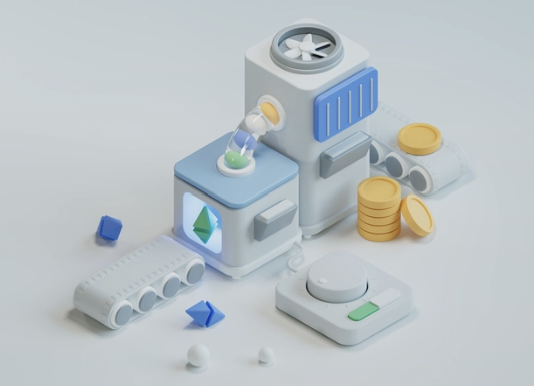

<div style="font-family:verdana; font-size:15px">
    <span style="color:crimson;">Machine
  failure</span>
 is when a machine stops working properly due to a defect or malfunction.

<br>
    <div style="font-size:15px; font-family:verdana;">This can lead to:<br><br>

<ol>
    <li>Downtime</li>
    <li> Lost Productivity </li>
    <li>Safety Hazards</li>
    
</ol>

Here we will use  Machine
   Learning
  to predict machine failure. Machine learning algorithms can analyze historical data to identify patterns that may indicate an impending failure. This information can then be used to schedule preventive maintenance or to take other steps to mitigate the risks of failure.
    
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            I am happy to tell you that I became discussion expert yesterday only, as I am also a beginner and on my learning journey as most of you. I just want to share something that I was learning from past 2 months, which may be useful for many kagglers working hard for the competitions. If you find this notebook useful in anyway, please upvote it so that it can reach a bigger audience. You can share it with your fellow kagglers.
        </p>
    </div>
    </p>
</div>
<br><br>
<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;">💬 Finally, I would like to take this opportunity to remind everyone to be <code>kind</code>, <code>happy</code> and <code>helpful</code>😃</p></blockquote>

# 1. Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

from tqdm.auto import tqdm
import math
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV
import warnings
import lightgbm as lgb
import xgboost as xgb
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_auc_score
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

#  2. Importing Data
       

In [2]:
submission = pd.read_csv("//kaggle/input/playground-series-s3e17/sample_submission.csv")
train_data = pd.read_csv("/kaggle/input/playground-series-s3e17/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s3e17/test.csv")
original_data = pd.read_csv("/kaggle/input/machine-failure-predictions/machine failure.csv")

# 3. Understanding Train Data

In [3]:
train_data.head()

id Product ID Type  Air temperature [K]  Process temperature [K]  \
0   0     L50096    L                300.6                    309.6   
1   1     M20343    M                302.6                    312.1   
2   2     L49454    L                299.3                    308.5   
3   3     L53355    L                301.0                    310.9   
4   4     M24050    M                298.0                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1596         36.1              140                0    0   
1                    1759         29.1              200                0    0   
2                    1805         26.5               25                0    0   
3                    1524         44.3              197                0    0   
4                    1641         35.4               34                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">.head() is used to see the <span style="color:crimson;">Initial 5 rows</span> of any data</p>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">This is our training data, consisting of  14
  columns and  1,36,429 rows accounting to a total of  19,10,006
    values. <span style="color:crimson;"></span></p><br>

In [4]:
train_data

id Product ID Type  Air temperature [K]  Process temperature [K]  \
0            0     L50096    L                300.6                    309.6   
1            1     M20343    M                302.6                    312.1   
2            2     L49454    L                299.3                    308.5   
3            3     L53355    L                301.0                    310.9   
4            4     M24050    M                298.0                    309.0   
...        ...        ...  ...                  ...                      ...   
136424  136424     M22284    M                300.1                    311.4   
136425  136425     H38017    H                297.5                    308.5   
136426  136426     L54690    L                300.5                    311.8   
136427  136427     L53876    L                301.7                    310.9   
136428  136428     L47937    L                296.9                    308.1   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                         1596         36.1              140                0   
1                         1759         29.1              200                0   
2                         1805         26.5               25                0   
3                         1524         44.3              197                0   
4                         1641         35.4               34                0   
...                        ...          ...              ...              ...   
136424                    1530         37.5              210                0   
136425                    1447         49.1                2                0   
136426                    1524         38.5              214                0   
136427                    1447         46.3               42                0   
136428                    1557         39.3              229                0   

        TWF  HDF  PWF  OSF  RNF  
0         0    0    0    0    0  
1         0    0    0    0    0  
2         0    0    0    0    0  
3         0    0    0    0    0  
4         0    0    0    0    0  
...     ...  ...  ...  ...  ...  
136424    0    0    0    0    0  
136425    0    0    0    0    0  
136426    0    0    0    0    0  
136427    0    0    0    0    0  
136428    0    0    0    0    0  

[136429 rows x 14 columns]

<div style="font-family:verdana; font-size:15px">
    <span style="color:crimson;">Data Discription: </span>
Features are explained as follows:

<br>
    <div style="font-size:15px; font-family:verdana;"><br><li>ID (Unique Device Identifier) is an identification code that is unique to each device. Codes range from 1 to 10,000.</li><p>
<li>Product ID is an identification code for each product. This ID is a combination of letters and numbers. Type is the type of product or device (Low, Medium, and High). Of all types of machines, the proportion is Low 50%, Medium 30% and High 20%</li><p>
        <li>Air temperature [K] is the air temperature in Kelvin units.</li><p>
        <li>Process temperature [K] is the temperature in the production process in units of Kelvin.</li><p>
<li>Rotational speed [rpm] is the number of revolutions in one minute.(calculated from a power of 2860 W, overlaid with a normally distributed noise)</li><p>
<li>Torque [Nm] is the force that causes an object to rotate. Torque is measured in Newton-meters (Nm). (torque values ​​are normally distributed around 40 Nm and no negative values)</li><p>
<li>Tool wear [min] is the time required to erode or damage production tools due to gradual wear and tear of cutting tools due to regular operation.</li><p>

Feature that indicating the area/cause of failure are:<br>

<ol>
    <li>TWF (Tool Wear Failure): It is indicating industrial tool failure resulting in the need for equipment change and defective products.</li>
    <li> HDF (Heat Dissipation Failure): It is indicating failure in heat dissipation during the production process. </li>
    <li>PWF (Power Failure): It is indicating that the power supplied was not fit to the production process need resulting in a failure.</li>
    <li>OSF (Overstain Failure): It is indicating failure involves product overstains which may be the result of high load and tension during production.</li>
     <li> RNF (Random Failure): It is indicating that a random error causes the failure. </li>
    
    
</ol>

<span style="color:crimson;">Sorted by the most number of failures are:</span>  TWF (134685), HDF (634), OSF (527), RNF (305), and PWF (278).
    
</div>

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">As we can see easily, we have <span style="color:crimson;">["Product ID"] and ["Type"]</span> as a categorial data,and everything else is in numeric type. In the future we have to to change non-numeric feature into numeric form using various encoding so that model perform better.</p><br>


In [6]:
train_data.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">As we can see easily, we don't have any <span style="color:crimson;">missing</span> values, hence you are free from this curse.</p><br>

In [7]:
train_data.describe()

id  Air temperature [K]  Process temperature [K]  \
count  136429.000000        136429.000000            136429.000000   
mean    68214.000000           299.862776               309.941070   
std     39383.804275             1.862247                 1.385173   
min         0.000000           295.300000               305.800000   
25%     34107.000000           298.300000               308.700000   
50%     68214.000000           300.000000               310.000000   
75%    102321.000000           301.200000               310.900000   
max    136428.000000           304.400000               313.800000   

       Rotational speed [rpm]    Torque [Nm]  Tool wear [min]  \
count           136429.000000  136429.000000    136429.000000   
mean              1520.331110      40.348643       104.408901   
std                138.736632       8.502229        63.965040   
min               1181.000000       3.800000         0.000000   
25%               1432.000000      34.600000        48.000000   
50%               1493.000000      40.400000       106.000000   
75%               1580.000000      46.100000       159.000000   
max               2886.000000      76.600000       253.000000   

       Machine failure            TWF            HDF            PWF  \
count    136429.000000  136429.000000  136429.000000  136429.000000   
mean          0.015744       0.001554       0.005160       0.002397   
std           0.124486       0.039389       0.071649       0.048899   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       0.000000   
50%           0.000000       0.000000       0.000000       0.000000   
75%           0.000000       0.000000       0.000000       0.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 OSF            RNF  
count  136429.000000  136429.000000  
mean        0.003958       0.002258  
std         0.062789       0.047461  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Using this code, one can easily see the <span style="color:crimson;">mathematical prospects</span> of any data</p><br>

In [8]:
train_data.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [9]:
 #Selecting numerical and categorical variables separatly.

nums_columns = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_columns = train_data.select_dtypes(include=['object']).columns.tolist()
features = nums_columns + cat_columns

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Dividing the whole data features based on the different data type: <span style="color:crimson;">Mainy into numeric and categorial data</span> </p><br>

In [10]:
nums_columns

['id',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [11]:
cat_columns

['Product ID', 'Type']

# 4. Exploratory Data Analysis

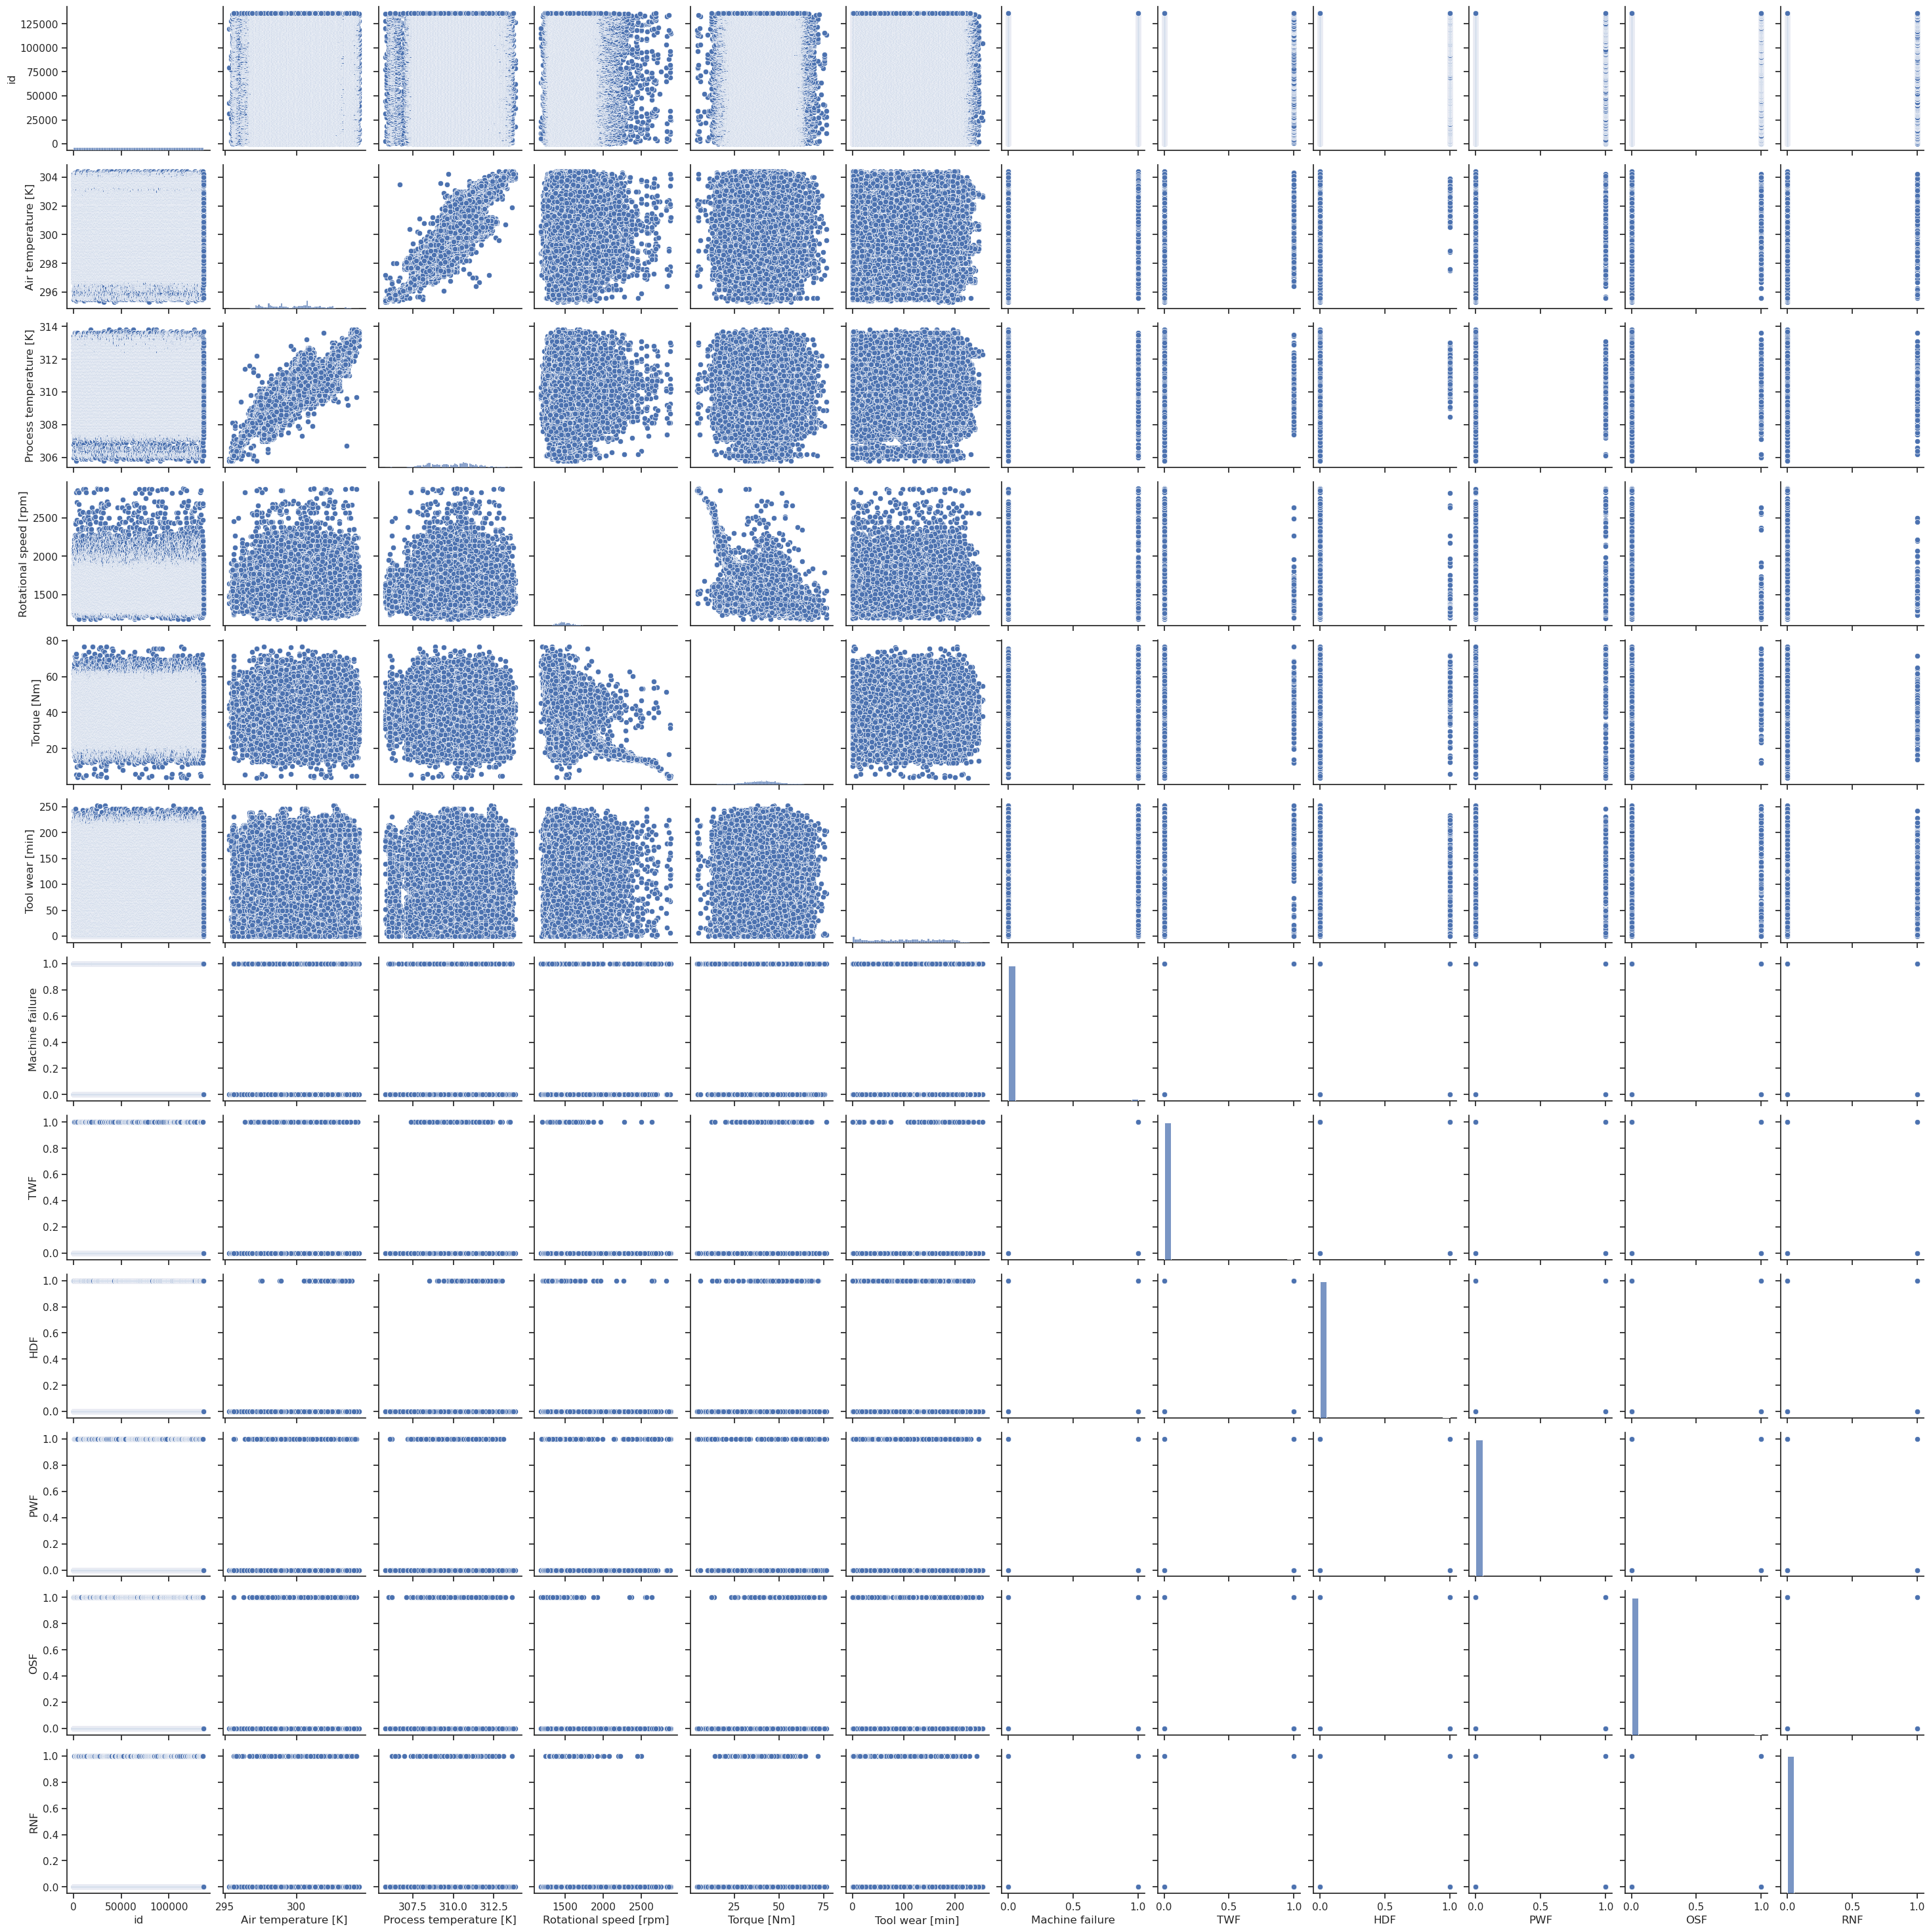

In [12]:
sns.set(style="ticks")
sns.pairplot(train_data)
plt.show()

<Axes: >

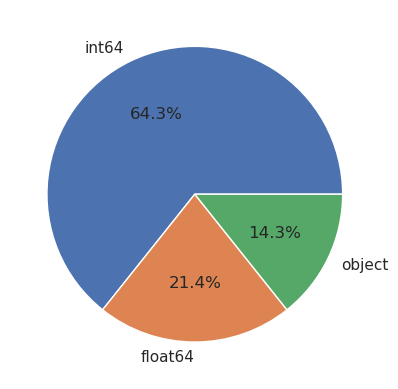

In [13]:
train_data.dtypes.value_counts().plot(kind='pie',autopct='%.1f%%')

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Based on the above Pie chart, it can be observed that the number of Type L machines accounts for 60% of the total 10,000 machines, the number of Type M machines accounts for 30% of the total 10,000 machines, and the number of Type H machines accounts for 10% of the total 10,000 machines.<span style="color:crimson;"></span></p><br>

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'Machine failure'}>,
        <Axes: title={'center': 'TWF'}>, <Axes: title={'center': 'HDF'}>],
       [<Axes: title={'center': 'PWF'}>, <Axes: title={'center': 'OSF'}>,
        <Axes: title={'center': 'RNF'}>]], dtype=object)

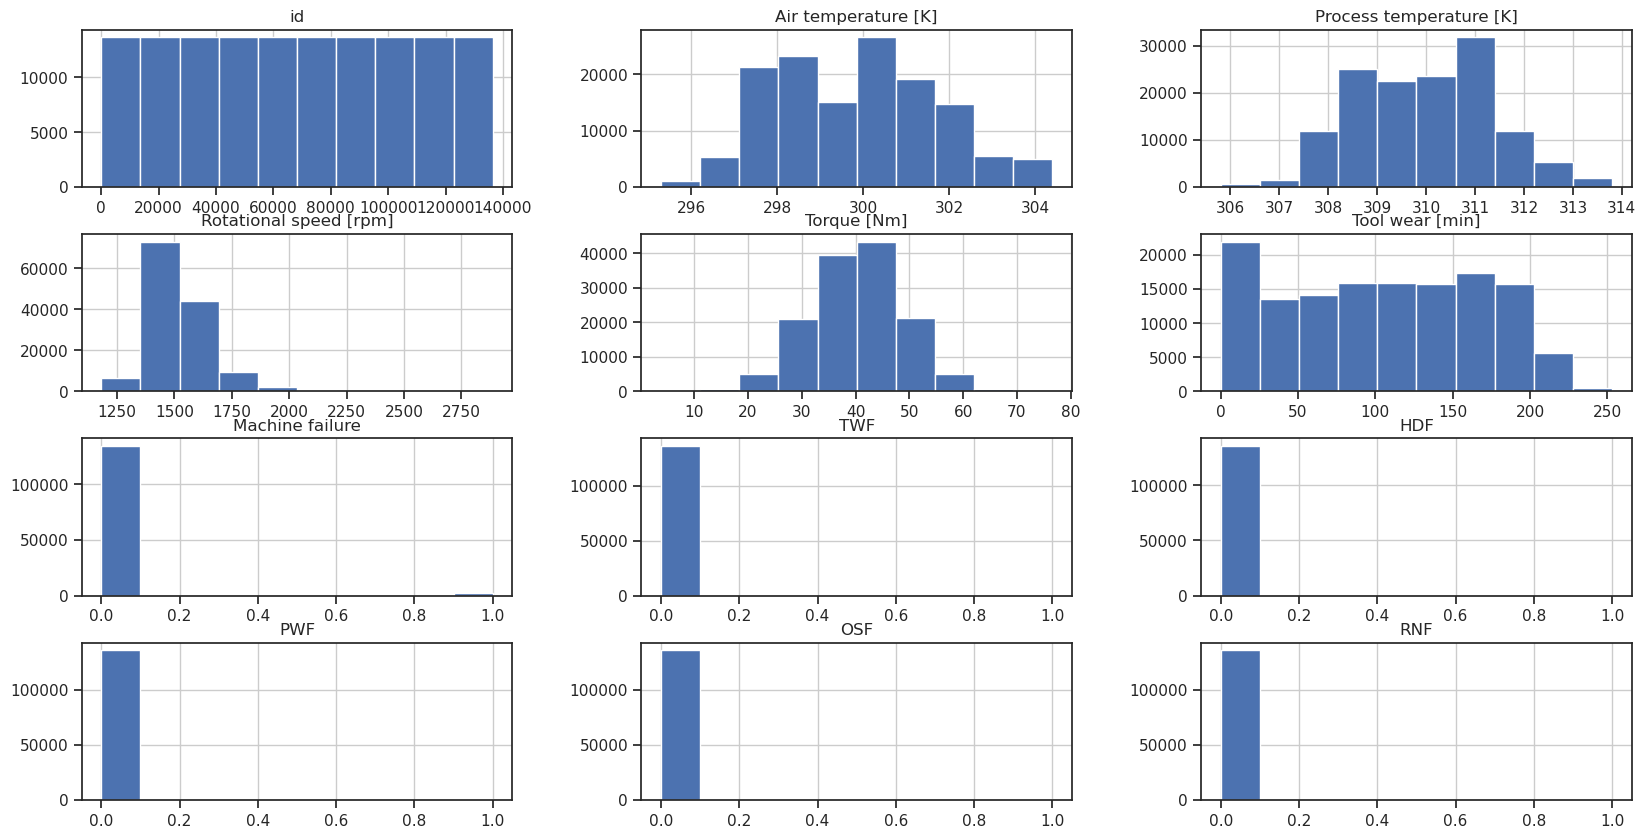

In [14]:
train_data.hist(figsize = (20, 10))

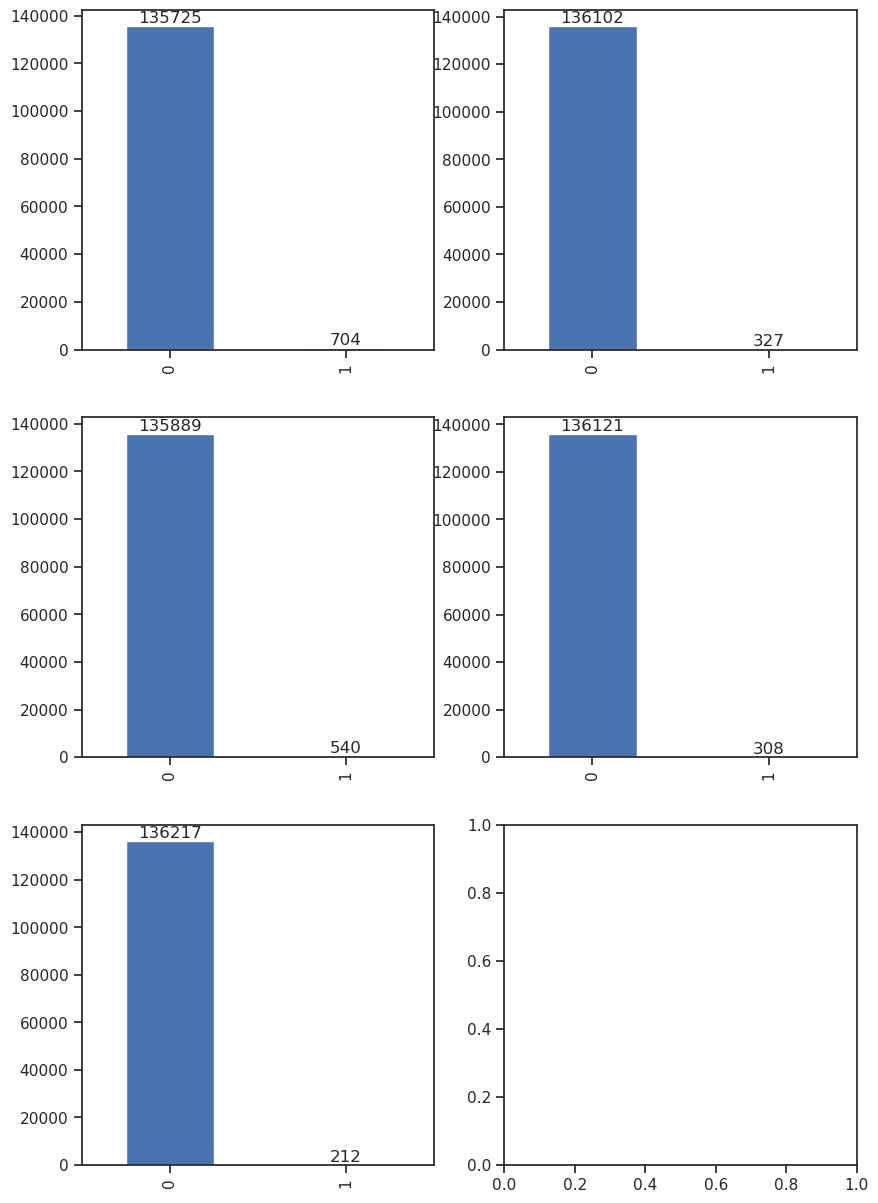

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(10, 20), sharex=False)

p9 = train_data['HDF'].value_counts().plot(kind='bar', figsize=(10, 15), ax=axes[0, 0])
p10 = train_data['PWF'].value_counts().plot(kind='bar', figsize=(10, 15), ax=axes[0, 1])
p11 = train_data['OSF'].value_counts().plot(kind='bar', figsize=(10, 15), ax=axes[1, 0])
p12 = train_data['RNF'].value_counts().plot(kind='bar', figsize=(10, 15), ax=axes[1, 1])
p13 = train_data['TWF'].value_counts().plot(kind='bar', figsize=(10, 15), ax=axes[2, 0])

plots = [p9, p10, p11, p12, p13]

for i in range(5):
    plots[i].set(ylabel=None, xlabel=None)
    ax = plots[i]
    for container in ax.containers:
        ax.bar_label(container)

plt.show()

<div style="font-family:verdana; font-size:15px">
    <span style="color:crimson;">Insights from this visualization are: </span>

<br>
    <div style="font-size:15px; font-family:verdana;"><br><li>HDF data: 9885 machines not damaged, 115 machines damaged due to temperature and rotational speed.</li>
        <li>PWF data: 9905 machines not damaged, 95 machines damaged due to power.</li>
<li>OSF data: 9902 machines not damaged, 98 machines damaged due to cutting tool wear and torque.</li>
        <li>RNF data: 9981 machines not damaged, 19 machines may fail with a 0.1% probability.</li>
        <li>TWF data: 9954 machines not damaged, 46 machines damaged due to tool wear.</li>
</div>

In [16]:
import plotly.express as px


class_map = {0: 'Class 0', 1: 'Class 1'}
train_data['ClassMap'] = train_data['Machine failure'].map(class_map)

fig = px.pie(train_data, names='ClassMap', height=540, width=840, hole=0.45,
             title='Target Overview - Machine failure',
             color_discrete_sequence=["#00008B", "#ADD8E6"])

fig.update_layout(font_color='#000000',
                  title_font_size=18,
                  showlegend=False)

fig.add_annotation(x=0.5, y=0.5, align='center', xref='paper', yref='paper',
                   showarrow=False, font_size=22, text='Class<br>Imbalance')


fig.show()

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Data is highly <span style="color:crimson;">"Imbalanced"</span> because there are only 2% of failures in the whole data.</p><br>

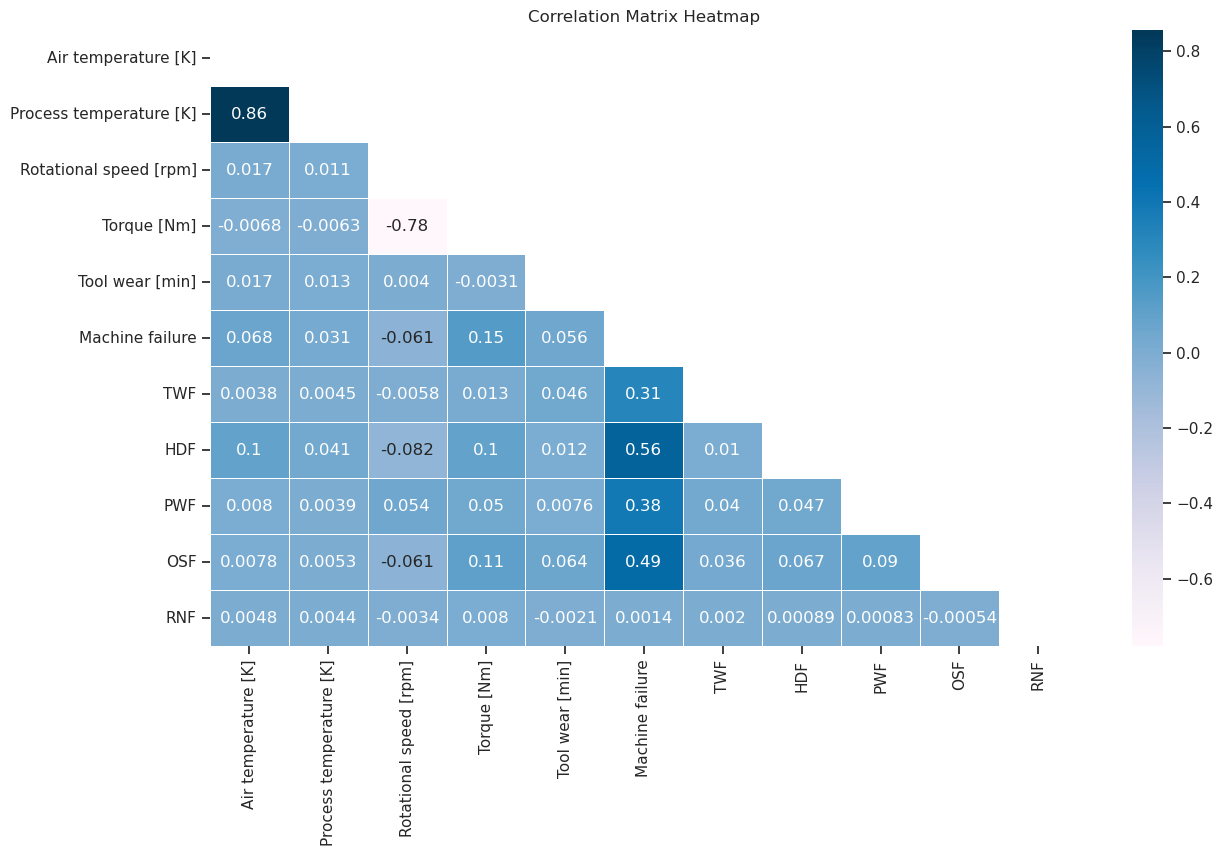

In [17]:
corr = train_data.drop('id', axis=1).corr()  # Excluding the 'id' column

# Create a correlation matrix heatmap with masking and custom colormap
fig, axes = plt.subplots(figsize=(14, 8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, linewidths=.5, cmap='PuBu', annot=True)

# Set the title of the heatmap
title_name = "Correlation Matrix Heatmap"
plt.title(title_name)
plt.show()

<p style="font-size:15px; font-family:verdana; line-height: 1.7em"><span style="color:crimson;">Torque and Rotation speed </span>are highly correlated.</p><br>

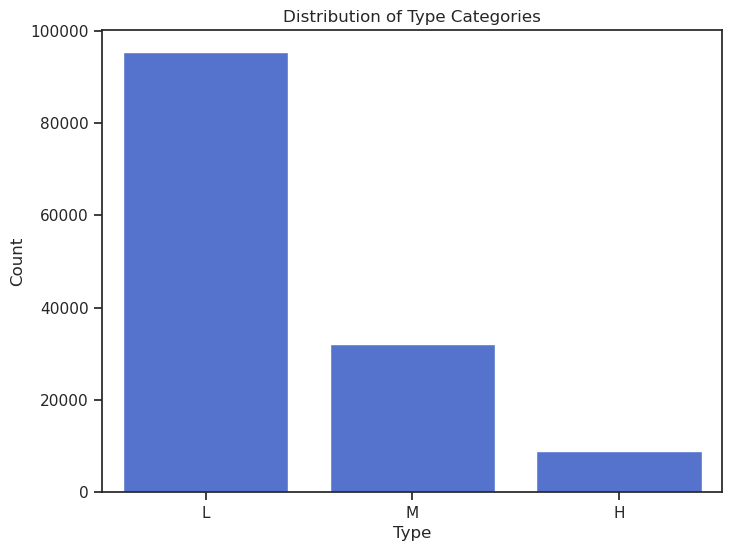

In [18]:
type_counts = train_data['Type'].value_counts()

# Creating a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, color='#4169e1')
plt.title('Distribution of Type Categories')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Based on the countplot, there are three types of features: Low (L) type with a count of 6,000 machines, Medium (M) type with a count of 2,997 machines, and High (H) type with a count of 1,003 machines. Since this categorical data has an ordinal nature, it will be encoded accordingly.<span style="color:crimson;"></span></p><br>

# 5. Data Pre-Processing

In [19]:
def mod_cat(df):

  df['Type']=df['Type'].replace({"L":0,"M":1,"H":2})
  return df

train_data=mod_cat(train_data)
test_data=mod_cat(test_data)

<p style="font-size:15px; font-family:verdana; line-height: 1.7em"><span style="color:crimson;"></span>Converting catgorial columns into numeric columns.</p><br>

In [20]:
train_data

id Product ID  Type  Air temperature [K]  Process temperature [K]  \
0            0     L50096     0                300.6                    309.6   
1            1     M20343     1                302.6                    312.1   
2            2     L49454     0                299.3                    308.5   
3            3     L53355     0                301.0                    310.9   
4            4     M24050     1                298.0                    309.0   
...        ...        ...   ...                  ...                      ...   
136424  136424     M22284     1                300.1                    311.4   
136425  136425     H38017     2                297.5                    308.5   
136426  136426     L54690     0                300.5                    311.8   
136427  136427     L53876     0                301.7                    310.9   
136428  136428     L47937     0                296.9                    308.1   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                         1596         36.1              140                0   
1                         1759         29.1              200                0   
2                         1805         26.5               25                0   
3                         1524         44.3              197                0   
4                         1641         35.4               34                0   
...                        ...          ...              ...              ...   
136424                    1530         37.5              210                0   
136425                    1447         49.1                2                0   
136426                    1524         38.5              214                0   
136427                    1447         46.3               42                0   
136428                    1557         39.3              229                0   

        TWF  HDF  PWF  OSF  RNF ClassMap  
0         0    0    0    0    0  Class 0  
1         0    0    0    0    0  Class 0  
2         0    0    0    0    0  Class 0  
3         0    0    0    0    0  Class 0  
4         0    0    0    0    0  Class 0  
...     ...  ...  ...  ...  ...      ...  
136424    0    0    0    0    0  Class 0  
136425    0    0    0    0    0  Class 0  
136426    0    0    0    0    0  Class 0  
136427    0    0    0    0    0  Class 0  
136428    0    0    0    0    0  Class 0  

[136429 rows x 15 columns]

In [21]:
def rename_cols(df):
    df.columns = df.columns.str.replace('[\[\]]', '', regex=True)
    return df

train_data=rename_cols(train_data)
test_data=rename_cols(test_data)

<p style="font-size:15px; font-family:verdana; line-height: 1.7em"><span style="color:crimson;"></span>Renaming columns by removing unccessary characters, as few models doesn't work with "[]"</p><br>

In [22]:
train_data.columns

Index(['id', 'Product ID', 'Type', 'Air temperature K',
       'Process temperature K', 'Rotational speed rpm', 'Torque Nm',
       'Tool wear min', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'ClassMap'],
      dtype='object')

In [23]:
test_data.columns

Index(['id', 'Product ID', 'Type', 'Air temperature K',
       'Process temperature K', 'Rotational speed rpm', 'Torque Nm',
       'Tool wear min', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [24]:
def drop_cols(df):
    df=df.drop(["id","Product ID"],axis=1)
    return df
train_data=drop_cols(train_data)
test_data=drop_cols(test_data)

<p style="font-size:15px; font-family:verdana; line-height: 1.7em"><span style="color:crimson;"></span>Dropping the features we doesn't need :["id","Product ID"] </p><br>

In [25]:
train_data.head()

Type  Air temperature K  Process temperature K  Rotational speed rpm  \
0     0              300.6                  309.6                  1596   
1     1              302.6                  312.1                  1759   
2     0              299.3                  308.5                  1805   
3     0              301.0                  310.9                  1524   
4     1              298.0                  309.0                  1641   

   Torque Nm  Tool wear min  Machine failure  TWF  HDF  PWF  OSF  RNF ClassMap  
0       36.1            140                0    0    0    0    0    0  Class 0  
1       29.1            200                0    0    0    0    0    0  Class 0  
2       26.5             25                0    0    0    0    0    0  Class 0  
3       44.3            197                0    0    0    0    0    0  Class 0  
4       35.4             34                0    0    0    0    0    0  Class 0

In [26]:
train_data.drop("ClassMap", axis = 1, inplace = True)

In [27]:
train_data.head()

Type  Air temperature K  Process temperature K  Rotational speed rpm  \
0     0              300.6                  309.6                  1596   
1     1              302.6                  312.1                  1759   
2     0              299.3                  308.5                  1805   
3     0              301.0                  310.9                  1524   
4     1              298.0                  309.0                  1641   

   Torque Nm  Tool wear min  Machine failure  TWF  HDF  PWF  OSF  RNF  
0       36.1            140                0    0    0    0    0    0  
1       29.1            200                0    0    0    0    0    0  
2       26.5             25                0    0    0    0    0    0  
3       44.3            197                0    0    0    0    0    0  
4       35.4             34                0    0    0    0    0    0

In [28]:
test_data.head()

Type  Air temperature K  Process temperature K  Rotational speed rpm  \
0     0              302.3                  311.5                  1499   
1     0              301.7                  311.0                  1713   
2     0              301.3                  310.4                  1525   
3     1              300.1                  309.6                  1479   
4     1              303.4                  312.3                  1515   

   Torque Nm  Tool wear min  TWF  HDF  PWF  OSF  RNF  
0       38.0             60    0    0    0    0    0  
1       28.8             17    0    0    0    0    0  
2       37.7             96    0    0    0    0    0  
3       47.6              5    0    0    0    0    0  
4       41.3            114    0    0    0    0    0

#  6. BaseLine Models: Cat | XGB | LGB

In [29]:
X = train_data.drop("Machine failure",axis=1)
Y = train_data["Machine failure"]

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 id="image">
         <span style="color:crimson;">(a) Lets start with Cat</span>
    </h1>
    <br>

In [30]:
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

importance_cat = []
roc_auc_scores = []

## Running 5-fold CV
for i in range(5):
    print(f'\nIteration {i+1} begins')
    kf = KFold(n_splits=5, shuffle=True, random_state=i)
    
    for train_idx, test_idx in kf.split(X, Y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]
        
        cat_model = CatBoostClassifier(random_state=42, verbose=0)
        cat_model.fit(X_train, Y_train)
        importance_cat.append(cat_model.feature_importances_)
        
        cat_pred = cat_model.predict_proba(X_test)[:, 1]
        
        roc_auc = roc_auc_score(Y_test, cat_pred)
        roc_auc_scores.append(roc_auc)
        
        print(f'Iteration {i+1} done. ROC AUC: {roc_auc:.5f}')
        
avg_roc_auc = np.mean(roc_auc_scores)
avg_roc_auc_cat = avg_roc_auc
print(f'\nThe average ROC AUC over 5 iterations is: {avg_roc_auc:.5f}')



Iteration 1 begins
Iteration 1 done. ROC AUC: 0.96485
Iteration 1 done. ROC AUC: 0.95762
Iteration 1 done. ROC AUC: 0.96056
Iteration 1 done. ROC AUC: 0.94274
Iteration 1 done. ROC AUC: 0.96235

Iteration 2 begins
Iteration 2 done. ROC AUC: 0.95237
Iteration 2 done. ROC AUC: 0.96489
Iteration 2 done. ROC AUC: 0.95525
Iteration 2 done. ROC AUC: 0.95610
Iteration 2 done. ROC AUC: 0.95835

Iteration 3 begins
Iteration 3 done. ROC AUC: 0.95060
Iteration 3 done. ROC AUC: 0.96599
Iteration 3 done. ROC AUC: 0.96132
Iteration 3 done. ROC AUC: 0.96800
Iteration 3 done. ROC AUC: 0.95237

Iteration 4 begins
Iteration 4 done. ROC AUC: 0.95835
Iteration 4 done. ROC AUC: 0.96316
Iteration 4 done. ROC AUC: 0.96261
Iteration 4 done. ROC AUC: 0.94511
Iteration 4 done. ROC AUC: 0.96053

Iteration 5 begins
Iteration 5 done. ROC AUC: 0.96945
Iteration 5 done. ROC AUC: 0.96065
Iteration 5 done. ROC AUC: 0.95735
Iteration 5 done. ROC AUC: 0.95640
Iteration 5 done. ROC AUC: 0.94430

The average ROC AUC over

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 id="image">
         <span style="color:crimson;">(b) Its time for XGB</span>
    </h1>
    <br>

In [31]:
import xgboost as xgb

importance_xgb = []
roc_auc_scores = []

## Running 5-fold CV
for i in range(5):
    print(f'\nIteration {i+1} begins')
    kf = KFold(n_splits=5, shuffle=True, random_state=i)
    
    for train_idx, test_idx in kf.split(X, Y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]
        
        xgb_model = xgb.XGBClassifier(random_state=42, verbosity=0)
        xgb_model.fit(X_train, Y_train)
        importance_xgb.append(xgb_model.feature_importances_)
        
        xgb_pred = xgb_model.predict_proba(X_test)[:, 1]
        
        roc_auc = roc_auc_score(Y_test, xgb_pred)
        roc_auc_scores.append(roc_auc)
        
        print(f'Iteration {i+1} done. ROC AUC: {roc_auc:.5f}')
        
avg_roc_auc = np.mean(roc_auc_scores)
avg_roc_auc_xgb = avg_roc_auc
print(f'\nThe average ROC AUC over 5 iterations is: {avg_roc_auc:.5f}')



Iteration 1 begins
Iteration 1 done. ROC AUC: 0.96667
Iteration 1 done. ROC AUC: 0.96266
Iteration 1 done. ROC AUC: 0.95766
Iteration 1 done. ROC AUC: 0.94810
Iteration 1 done. ROC AUC: 0.96500

Iteration 2 begins
Iteration 2 done. ROC AUC: 0.95810
Iteration 2 done. ROC AUC: 0.96374
Iteration 2 done. ROC AUC: 0.96235
Iteration 2 done. ROC AUC: 0.95495
Iteration 2 done. ROC AUC: 0.95911

Iteration 3 begins
Iteration 3 done. ROC AUC: 0.95920
Iteration 3 done. ROC AUC: 0.96848
Iteration 3 done. ROC AUC: 0.96173
Iteration 3 done. ROC AUC: 0.95828
Iteration 3 done. ROC AUC: 0.95416

Iteration 4 begins
Iteration 4 done. ROC AUC: 0.96012
Iteration 4 done. ROC AUC: 0.96674
Iteration 4 done. ROC AUC: 0.96266
Iteration 4 done. ROC AUC: 0.94888
Iteration 4 done. ROC AUC: 0.96619

Iteration 5 begins
Iteration 5 done. ROC AUC: 0.97398
Iteration 5 done. ROC AUC: 0.96532
Iteration 5 done. ROC AUC: 0.96038
Iteration 5 done. ROC AUC: 0.95272
Iteration 5 done. ROC AUC: 0.94501

The average ROC AUC over

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 id="image">
         <span style="color:crimson;">(c) At last LGB </span>
    </h1>
    <br>

In [32]:
import lightgbm as lgb

importance_lgb = []
roc_auc_scores = []

## Running 5-fold CV
for i in range(5):
    print(f'\nIteration {i+1} begins')
    kf = KFold(n_splits=5, shuffle=True, random_state=i)
    
    for train_idx, test_idx in kf.split(X, Y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]
        
        lgb_model = lgb.LGBMClassifier(random_state=42, verbosity=0)
        lgb_model.fit(X_train, Y_train)
        importance_lgb.append(lgb_model.feature_importances_)
        
        lgb_pred = lgb_model.predict_proba(X_test)[:, 1]
        
        roc_auc = roc_auc_score(Y_test, lgb_pred)
        roc_auc_scores.append(roc_auc)
        
        print(f'Iteration {i+1} done. ROC AUC: {roc_auc:.5f}')
        
avg_roc_auc = np.mean(roc_auc_scores)
avg_roc_auc_lgb = avg_roc_auc
print(f'\nThe average ROC AUC over 5 iterations is: {avg_roc_auc:.5f}')



Iteration 1 begins
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Iteration 1 done. ROC AUC: 0.96488
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Iteration 1 done. ROC AUC: 0.95984
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 id="image">
         <span style="color:crimson;">Final Visualization!!</span>
    </h1>
    <br>

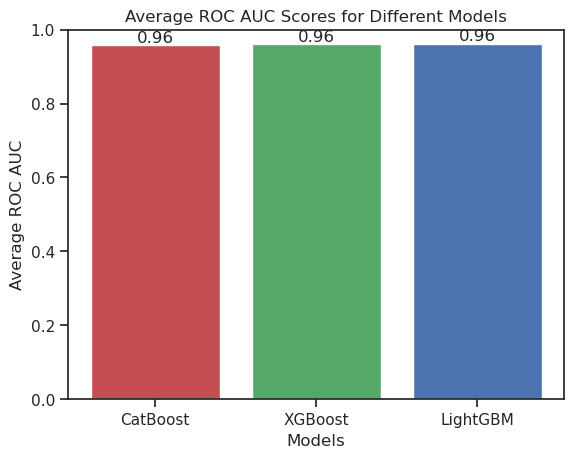

In [33]:
models = ['CatBoost', 'XGBoost', 'LightGBM']
avg_roc_auc = [avg_roc_auc_cat, avg_roc_auc_xgb, avg_roc_auc_lgb]

colors = ['r', 'g', 'b'] 

plt.bar(models, avg_roc_auc, color=colors)
plt.xlabel('Models')
plt.ylabel('Average ROC AUC')
plt.title('Average ROC AUC Scores for Different Models')
plt.ylim(0, 1)
for i in range(len(models)):
    
    plt.text(i, avg_roc_auc[i], str(round(avg_roc_auc[i], 2)), ha='center', va='bottom')

plt.show()

# 7. Conclusion

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Our CV results using CatBoost, XGB and LightGBM models have average outcome. However, there is still room for improvement in this code and EDA notebook. Consider techniques like hyper-parameter tuning, feature selection, and feature generation to enhance the model further. These approaches can optimize your model's performance and provide valuable insights. Keep refining the code and analysis to achieve even better results! <span style="color:crimson;"></span></p><br>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            If this notebook, helped you in any way, help me becoming Notebook Expert !!
            <br><br>
            With regards
            <br>
            Tensor Boy
    </div>
    </p>
</div>
<br><br>